# Random Forest Classification

In this exercise we will be tuning the RandomForest hyperparameters

Satrt by Importing useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


Reading the data which is included in the 'data_banknote_authentication.csv' file

In [2]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [3]:
df = pd.read_csv("/content/MyDrive/MyDrive/datasets/data_banknote_authentication.csv")

In [5]:
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Diving the data into features and labels (X and y)

In [9]:
X = df.drop('Class', axis=1)  # Features
y = df['Class']               # Labels


# Splitting the data into train and test parts



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Use the RandomForest model with a GridSearch to optimize 'n_estimators', 'max_features' and 'criterion' parameters

In [22]:
# Use 10 random trees
model = RandomForestClassifier(n_estimators=10,max_features='sqrt',random_state=101)

In [23]:
model.fit(X_train,y_train)


RandomForestClassifier(n_estimators=10, random_state=101)

In [25]:
preds = model.predict(X_test)

Evaluate the model by displaying a confusion matrix and a classification report

In [26]:
confusion_matrix(y_test,preds)

array([[235,   3],
       [  0, 174]])

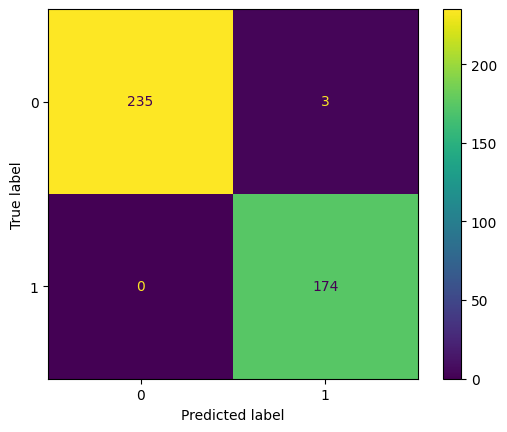

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

test_error = []

for n in range(1, 40):
    model = RandomForestClassifier(n_estimators=n, max_features='sqrt')
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    test_error.append(1 - accuracy_score(y_test, test_preds))

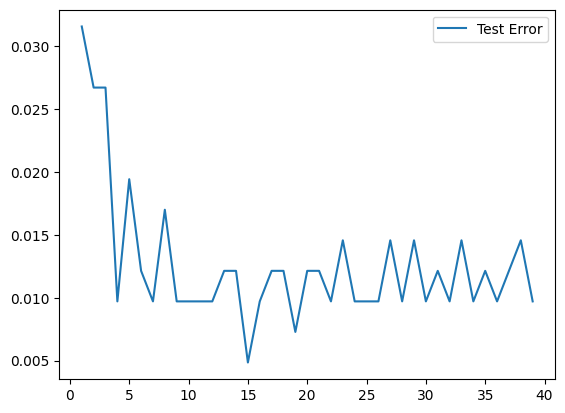

In [29]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()